In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import matplotlib as mpl
import seaborn as sns
import torch
from torch.distributions import MultivariateNormal
from labproject.data import toy_mog_2d

In [11]:
torch.manual_seed(2)
n_samples = 5000
toy_mog = toy_mog_2d()
samples_mog = toy_mog.sample(n_samples)
samples_np = samples_mog.numpy()
samples_normal_approx = MultivariateNormal(samples_mog.mean(dim=0), samples_mog.T.cov()).sample((n_samples,)).numpy()

densities = [samples_np, samples_normal_approx, samples_np[-200:]]
[torch.Tensor(d).T.cov() for d in densities]

[tensor([[3.8583, 1.1977],
         [1.1977, 2.2302]]),
 tensor([[3.9229, 1.1951],
         [1.1951, 2.2475]]),
 tensor([[3.8636, 0.9178],
         [0.9178, 1.7540]])]

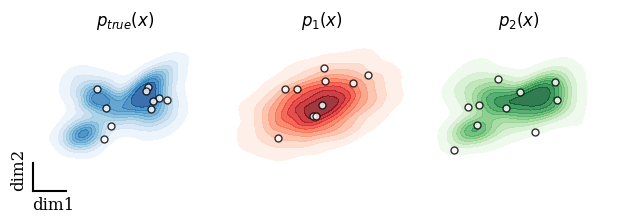

In [23]:
n_plot = 10
samples_to_plot = samples_np[0:10,:]

al=0.8
ms=10
mec='k'


samples_plot = [samples_np[:10], samples_normal_approx[10:20], samples_np[-10:]]
titles = [r'$p_{true}(x)$', r'$p_{1}(x)$', r'$p_{2}(x)$']
cmaps = ['Blues', 'Reds', 'Greens']

with mpl.rc_context(fname='../matplotlibrc'):
    fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(6,2))
    for i_a, ax in enumerate(axs):
        density, samples, cmap, title = densities[i_a], samples_plot[i_a], cmaps[i_a], titles[i_a]
        sns.kdeplot(x=density[:,0], y=density[:,1], fill=True, thresh=0.05, levels=10, cmap=cmap, ax=ax, alpha=al)
        ax.plot(samples[:, 0], samples[:, 1], 'w.', ms=ms, mec=mec, alpha=0.8)
        ax.set_xticks([]); ax.set_yticks([])
        if i_a==0:
            ax.spines['left'].set_bounds(-7, -5)
            ax.spines['bottom'].set_bounds(-7, -5)
            ax.set_xlabel('dim1', loc='left', fontsize=12); 
            ax.set_ylabel('dim2', loc='bottom', fontsize=12)
        else:
            ax.spines['left'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
        
        ax.set_title(title, fontsize=12);
        ax.set_xlim([-7,4]); ax.set_ylim([-7,4])
    fig.tight_layout(pad=0, w_pad=1)
    fig.savefig('../plots/schematic.png', dpi=300)